# OPIUM and ABINIT Calculation Auxiliary Python Batch Calculation and Plotting Script Notebook
## For PHY8305 Computational Materials Course Report
Author: ymguo (ymguo.phy@sjtu.edu.cn ymguo.phy@outlook.com)

## Preparation function

In [4]:
import subprocess
import sys
import importlib
import os

WORKdir='/mnt/e/WSL/compmatphy/workdir2/'
RESULTdir=WORKdir+'result/' #storeing for all result at one root file
SCRIPTdir=WORKdir+'py/'#storeing for all scripts 
SAVEdir=WORKdir+'figures/'
abinit_psp_dir=WORKdir+'abinit-psp/'#Default fhi file location 

OPIUM_RAW_file='Ca_OPIUM_param_raw_script.txt'
ABINIT_RELAX_RAW_file_RC='Ca_ABINIT_relax_raw_script-optcell-1.txt'
ABINIT_RELAX_RAW_file_K='Ca_ABINIT_relax_raw_script-kgrid.txt'
ABINIT_RELAX_RAW_file_Ecut='Ca_ABINIT_relax_raw_script-ecut.txt'
ABINIT_RELAX_RAW_file_TSMEAR='Ca_ABINIT_relax_raw_script-tsmear.txt'
ABINIT_RELAX_EXP_name='Ca_relax_abinit'
OPIUM_file_name='Ca'


# 检查目录是否存在
directories = [WORKdir, RESULTdir, SCRIPTdir, SAVEdir, abinit_psp_dir]
for directory in directories:
    if os.path.exists(directory):
        print(f"Directory '{directory}' exists.")
    else:
        print(f"Directory '{directory}' does not exist.")

# 检查文件是否存在
files = [OPIUM_RAW_file, ABINIT_RELAX_RAW_file_RC, ABINIT_RELAX_RAW_file_K, 
         ABINIT_RELAX_RAW_file_Ecut, ABINIT_RELAX_RAW_file_TSMEAR, 
         ABINIT_RELAX_EXP_name]
for file in files:
    if os.path.exists(file):
        print(f"File '{file}' exists.")
    else:
        print(f"File '{file}' does not exist.")



required_libraries = ['numpy', 'matplotlib', 'pandas', 'shutil', 'datetime', 'itertools', 'os', 'subprocess', 'csv', 'netCDF4','multiprocessing','functools']
required_software = ['abinit']
OPIUMdir = '/mnt/e/WSL/compmatphy/workdir/fhi/opium'







def import_or_install(package):
    """检查并安装指定的Python库"""
    try:
        importlib.import_module(package)
    except ImportError:
        print(f"正在安装 {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} 安装完成。")

def check_software_installed(software_name):
    """检查指定的软件是否已安装"""
    try:
        subprocess.run([software_name, '--version'], check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        return True
    except (subprocess.CalledProcessError, FileNotFoundError):
        return False

def main():
    # 检查必要的Python库是否已安装
    required_libraries = ['numpy', 'matplotlib', 'pandas', 'shutil', 'datetime', 'itertools', 'os', 'subprocess', 'csv', 'netCDF4','multiprocessing',]
    for lib in required_libraries:
        import_or_install(lib)

    # 检查必要的软件是否已安装

    missing_software = [soft for soft in required_software if not check_software_installed(soft)]
    
    if missing_software:
        print("以下必要的软件未安装：")
        for soft in missing_software:
            print(f"  - {soft}")
        return

    
    if not os.path.exists(OPIUMdir):
        print(f"OPIUM目录 {OPIUMdir} 不存在")
        return

    print("所有必要的库和软件均已正确安装，可以正常运行。")

if __name__ == "__main__":
    main()



#import and assign alias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil as sh       #复制文件
from datetime import datetime
import itertools
import multiprocessing as mp

import csv
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Time Stamp Generator
from datetime import datetime

def get_current_timestamp():
    """
    获取当前时间的时间戳，并格式化为字符串。
    """
    # 获取当前时间
    now = datetime.now()
    # 格式化为字符串，格式为：年月日时分秒
    timestamp = now.strftime("%Y%m%d%H%M%S")
    return timestamp


Directory '/mnt/e/WSL/compmatphy/workdir2/' exists.
Directory '/mnt/e/WSL/compmatphy/workdir2/result/' exists.
Directory '/mnt/e/WSL/compmatphy/workdir2/py/' exists.
Directory '/mnt/e/WSL/compmatphy/workdir2/figures/' does not exist.
Directory '/mnt/e/WSL/compmatphy/workdir2/abinit-psp/' exists.
File 'Ca_OPIUM_param_raw_script.txt' exists.
File 'Ca_ABINIT_relax_raw_script-optcell-1.txt' exists.
File 'Ca_ABINIT_relax_raw_script-kgrid.txt' exists.
File 'Ca_ABINIT_relax_raw_script-ecut.txt' exists.
File 'Ca_ABINIT_relax_raw_script-tsmear.txt' exists.
File 'Ca_relax_abinit' does not exist.
所有必要的库和软件均已正确安装，可以正常运行。


# Computational Material Physics Project: OPIUM and Ab Init

## Section 1: $r_c$ 收敛测试：总能量与晶格常数随 $r_c$ 的变化表

### Predefined Function for rc convergence test

In [61]:
### Predefined Function for rc convergence test
def calculate_pseudo_fhi(OPIUM_param_raw_script, OPIUM_param_file_name, OPIUM_OUTPUT_dir, pseudo_rc1='', pseudo_rc2='', pseudo_rc3='', pseudo_rc4=''):
    # Change the current working directory to the specified folder
    os.makedirs(OPIUM_OUTPUT_dir, exist_ok=True)
    os.chdir(OPIUM_OUTPUT_dir)
    # Format the raw script string, inserting pseudopotential parameters
    OPIUM_param_script = OPIUM_param_raw_script.format(pseudo_rc1=pseudo_rc1, pseudo_rc2=pseudo_rc2, pseudo_rc3=pseudo_rc3, pseudo_rc4=pseudo_rc4)
    
    # Use the 'with' statement to open the file, ensuring it is automatically closed after the operation
    with open(OPIUM_param_file_name+'.param', 'w') as file:
        # Write the entire multi-line text at once
        file.write(OPIUM_param_script)
    
    # Execute the task
    result = subprocess.run([OPIUMdir, OPIUM_param_file_name, OPIUM_param_file_name+'.log', 'ae', 'ps', 'nl', 'fhi'], capture_output=True, text=True) # , 'plot', 'wp', 'plot', 'vi'
    
    # Print the output of the command
    print(result.stdout)


# copy_fhi_to_abinit_psp
def copy_fhi_to_abinit_psp(OPIUM_OUTPUT_dir, abinit_psp_dir, OPIUM_param_file_name):
    """
    Copy the .fhi pseudopotential file from the OPIUM output directory to the ABINIT pseudopotential directory.

    Parameters:
        OPIUM_OUTPUT_dir (str): Path to the directory containing OPIUM output files.
        abinit_psp_dir (str): Path to the ABINIT pseudopotential directory.
        OPIUM_param_file_name (str): Base name of the OPIUM parameter file.
    """
    # Construct source and destination file paths
    src_file_path = os.path.join(OPIUM_OUTPUT_dir, f"{OPIUM_param_file_name}.fhi")
    dst_file_path = os.path.join(abinit_psp_dir, f"{OPIUM_param_file_name}.fhi")
    
    # Copy the file
    shutil.copy(src_file_path, dst_file_path)
    print(f"File {src_file_path} has been copied to {dst_file_path}")


def generate_abinit_relax_script(ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_param_file_name, IN_SCRIPT_OUTPUT_dir):
    """
    Generate a new ABINIT relaxation input script based on a template.

    Parameters:
        ABINIT_relax_raw_script (str): Template content for the ABINIT relaxation script.
        ABINIT_relax_script_name (str): Name of the new relaxation script file (without extension).
        abinit_psp_dir (str): Directory containing the ABINIT pseudopotentials.
        OPIUM_param_file_name (str): Base name of the pseudopotential file.
        IN_SCRIPT_OUTPUT_dir (str): Output directory for the generated script.
    """
    
    new_script_content = ABINIT_relax_raw_script.format(abinit_psp_dir=abinit_psp_dir, OPIUM_param_file_name=OPIUM_param_file_name)

    # Construct the full path for the new script file
    new_script_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')
    
    # Ensure the output directory exists
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)
    os.chdir(IN_SCRIPT_OUTPUT_dir)
    # Generate the new script file
    with open(new_script_file_path, 'w') as f:
        f.write(new_script_content)

    print(f"The new script file {new_script_file_path} has been generated")

# Example usage:
# generate_abinit_relax_script('path/to/ABINIT_relax_raw_script', 'new_script_name', '/path/to/abinit_psp_dir', 'OPIUM_param_file_name', '/path/to/IN_SCRIPT_OUTPUT_dir')




def read_nc_variable(file_path, var_name):
    """
    Read a specific variable's data from a NetCDF (.nc) file.

    Parameters:
        file_path (str): Path to the NetCDF file.
        var_name (str): Name of the variable to extract.

    Returns:
        numpy.ndarray or int: The data associated with the variable, or 0 if the variable is not found.
    """
    # Open the .nc file
    dataset = nc.Dataset(file_path, 'r')

    # Read the specific variable's value
    if var_name in dataset.variables:
        var_data = dataset.variables[var_name][:]
        # Close the file
        dataset.close()
        return var_data
    else:
        # Close the file
        dataset.close()
        return 0


### Generate the required pseudopotential parameter test array.

#### 第一测试组:上下区间,所有变量

In [ ]:
def generate_combinations(pseudo_rcs0, pseudo_rcp0, pseudo_rcd0, pseudo_rcf0, range_value, step):
    """
    Generate all possible combinations of four columns where each column's value
    ranges from (pseudo_rcs0 - range_value) to (pseudo_rcs0 + range_value) with the given step.

    Parameters:
        pseudo_rcs0 (float): The base value used to compute the range for each pseudo_rc column.
        range_value (float): The range for each pseudo_rc, defining the spread above and below pseudo_rcs0.
        step (float): The step size, defining the interval between consecutive values in each column.

    Returns:
        list of tuples: A list of all possible combinations, where each combination is a tuple of four values.
    """
    # Calculate the range of values for each pseudo_rc column
    pseudo_rcs_values = np.arange(pseudo_rcs0 - range_value, pseudo_rcs0 + range_value + step, step)
    pseudo_rcp_values = np.arange(pseudo_rcp0 - range_value, pseudo_rcp0 + range_value + step, step)
    pseudo_rcd_values = np.arange(pseudo_rcd0 - range_value, pseudo_rcd0 + range_value + step, step)
    pseudo_rcf_values = np.arange(pseudo_rcf0 - range_value, pseudo_rcf0 + range_value + step, step)

    # Generate all combinations of the four pseudo_rc columns
    combinations = itertools.product(pseudo_rcs_values, pseudo_rcp_values, pseudo_rcd_values, pseudo_rcf_values)
    
    # Return the list of all combinations
    return list(combinations)



In [ ]:
# Example usage
pseudo_rcs0 = 1.38
pseudo_rcp0 = 1.71
pseudo_rcd0 = 1.78
pseudo_rcf0 = 1.70
range_value = 0.1
step = 0.05
combinations = generate_combinations(pseudo_rcs0, pseudo_rcp0,pseudo_rcd0,pseudo_rcf0, range_value, step)

#### 第二测试组:浮动上下区间,单一变量

In [ ]:
import numpy as np

def generate_combinations_2(pseudo_rc_params, range_values, step):
    """
    Generate all possible combinations where only one pseudo_rc parameter changes at a time
    and others remain fixed.

    Parameters:
        pseudo_rc_params (list of floats): The base values used to compute the range for each pseudo_rc parameter.
        range_values (list of floats): The range for each pseudo_rc, defining the spread above and below each pseudo_rc base value.
        step (float): The step size, defining the interval between consecutive values in each column.

    Returns:
        list of tuples: A list of all possible combinations, where each combination is a tuple of pseudo_rc values.
        list of ints: A list containing the number of data points for each parameter.
    """
    # Create an empty list to store the final combinations
    combinations = []

    # Calculate the number of data points for each parameter (based on range and step)
    param_counts = []
    for i in range(len(pseudo_rc_params)):
        param_range = np.linspace(pseudo_rc_params[i] - range_values[i], pseudo_rc_params[i] + range_values[i], 
                                  int(2 * range_values[i] / step) + 1)  # linspace ensures the correct number of points
        param_counts.append(len(param_range))
    
    # Generate the combinations by changing one pseudo_rc parameter at a time
    for i in range(len(pseudo_rc_params)):
        # Copy the original pseudo_rc_params list to keep the other variables fixed
        fixed_params = pseudo_rc_params.copy()

        # Generate values for the current parameter by varying within its range
        param_range = np.linspace(pseudo_rc_params[i] - range_values[i], pseudo_rc_params[i] + range_values[i], 
                                  int(2 * range_values[i] / step) + 1)  # linspace ensures the correct number of points

        # Create all combinations by changing only the current parameter
        for val in param_range:
            fixed_params[i] = val
            combinations.append(tuple(fixed_params))
    
    # Output the number of data points for each parameter
    print("Number of data points for each parameter:")
    for i, count in enumerate(param_counts):
        print(f"Parameter {i+1}: {count} data points")
    
    return combinations, param_counts

In [ ]:
# 示例使用
pseudo_rc_params = [1.38, 1.71, 1.78, 1.70]  # 给定的伪势参数
range_values = [0.3, 0.3, 0.3, 0.3]  # 对每个参数的范围，假设只改变第一个伪势参数
step = 0.01  # 步长

combinations, param_counts = generate_combinations_2(pseudo_rc_params, range_values, step)
for combo in combinations[:]:  # 打印前10个组合
    print(combo)
print("Parameter counts:", param_counts)

#### 第三测试组:固定下区间,浮动上区间,单一变量

In [36]:
def generate_combinations_3(pseudo_rc_params, range_values, step, lower_limit):
    """
    Generate all possible combinations where only one pseudo_rc parameter changes at a time
    and others remain fixed, starting from a fixed lower limit.

    Parameters:
        pseudo_rc_params (list of floats): The base values used to compute the range for each pseudo_rc parameter.
        range_values (list of floats): The range for each pseudo_rc, defining the spread above and below each pseudo_rc base value.
        step (float): The step size, defining the interval between consecutive values in each column.
        lower_limit (float): The fixed lower limit for each parameter.

    Returns:
        list of tuples: A list of all possible combinations, where each combination is a tuple of pseudo_rc values.
    """
    # Create an empty list to store the final combinations
    combinations = []

    # Calculate the number of data points for each parameter (based on range and step)
    param_counts = []
    for i in range(len(pseudo_rc_params)):
        param_range = np.arange(lower_limit, pseudo_rc_params[i] + range_values[i] + step, step)  # Generate array from lower limit to max value
        param_counts.append(len(param_range))
    
    # Generate the combinations by changing one pseudo_rc parameter at a time
    for i in range(len(pseudo_rc_params)):
        # Copy the original pseudo_rc_params list to keep the other variables fixed
        fixed_params = pseudo_rc_params.copy()

        # Generate values for the current parameter by varying within its range
        param_range = np.arange(lower_limit, pseudo_rc_params[i] + range_values[i] + step, step)

        # Create all combinations by changing only the current parameter
        for val in param_range:
            fixed_params[i] = val
            combinations.append(tuple(fixed_params))
    
    # Output the number of data points for each parameter
    print("Number of data points for each parameter:")
    for i, count in enumerate(param_counts):
        print(f"Parameter {i+1}: {count} data points")
    
    return combinations,param_counts

Number of data points for each parameter:
Parameter 1: 109 data points
Parameter 2: 142 data points
Parameter 3: 149 data points
Parameter 4: 141 data points
(0.7, 1.71, 1.78, 1.7)
(0.71, 1.71, 1.78, 1.7)
(0.72, 1.71, 1.78, 1.7)
(0.73, 1.71, 1.78, 1.7)
(0.74, 1.71, 1.78, 1.7)
(0.75, 1.71, 1.78, 1.7)
(0.76, 1.71, 1.78, 1.7)
(0.77, 1.71, 1.78, 1.7)
(0.78, 1.71, 1.78, 1.7)
(0.79, 1.71, 1.78, 1.7)
(0.8, 1.71, 1.78, 1.7)
(0.81, 1.71, 1.78, 1.7)
(0.8200000000000001, 1.71, 1.78, 1.7)
(0.8300000000000001, 1.71, 1.78, 1.7)
(0.8400000000000001, 1.71, 1.78, 1.7)
(0.8500000000000001, 1.71, 1.78, 1.7)
(0.8600000000000001, 1.71, 1.78, 1.7)
(0.8700000000000001, 1.71, 1.78, 1.7)
(0.8800000000000001, 1.71, 1.78, 1.7)
(0.8900000000000001, 1.71, 1.78, 1.7)
(0.9000000000000001, 1.71, 1.78, 1.7)
(0.9100000000000001, 1.71, 1.78, 1.7)
(0.9200000000000002, 1.71, 1.78, 1.7)
(0.9300000000000002, 1.71, 1.78, 1.7)
(0.9400000000000002, 1.71, 1.78, 1.7)
(0.9500000000000002, 1.71, 1.78, 1.7)
(0.9600000000000002, 1.7

In [ ]:
# Example usage
pseudo_rc_params = [1.38, 1.71, 1.78, 1.70]  # Given pseudo_rc parameters
range_values = [0.4, 0.4, 0.4, 0.4]  # Range for each parameter
step = 0.01  # Step size
lower_limit = 0.7  # Fixed lower limit

combinations, param_counts = generate_combinations_3(pseudo_rc_params, range_values, step,lower_limit)
for combo in combinations[:]:  # 打印前10个组合
    print(combo)
print("Parameter counts:", param_counts)

#### 第四测试组:固定下区间,固定上区间,控制上下变量

In [66]:
def generate_combinations_4(pseudo_rc_params, lower_limits, upper_limits, step):
    """
    Generate all possible combinations where only one pseudo_rc parameter changes at a time
    and others remain fixed, based on their lower and upper limits.

    Parameters:
        pseudo_rc_params (list of floats): The default values of the pseudo_rc parameters.
        lower_limits (list of floats): The lower limits for each parameter.
        upper_limits (list of floats): The upper limits for each parameter.
        step (float): The step size, defining the interval between consecutive values in each column.

    Returns:
        list of tuples: A list of all possible combinations, where each combination is a tuple of pseudo_rc values.
        list of ints: A list containing the number of data points for each parameter.
    """
    # Create an empty list to store the final combinations
    combinations = []

    # Calculate the number of data points for each parameter (based on range and step)
    param_counts = []
    for i in range(len(pseudo_rc_params)):
        param_range = np.arange(lower_limits[i], upper_limits[i] + step, step)
        param_counts.append(len(param_range))
    
    # Generate the combinations by changing one pseudo_rc parameter at a time
    for i in range(len(pseudo_rc_params)):
        # Copy the original pseudo_rc_params list to keep the other variables fixed
        fixed_params = pseudo_rc_params.copy()

        # Generate values for the current parameter by varying within its range
        param_range = np.arange(lower_limits[i], upper_limits[i] + step, step)

        # Create all combinations by changing only the current parameter
        for val in param_range:
            fixed_params[i] = val
            combinations.append(tuple(fixed_params))

    # Output the number of data points for each parameter
    print("Number of data points for each parameter:")
    for i, count in enumerate(param_counts):
        print(f"Parameter {i+1}: {count} data points")
    
    return combinations, param_counts



In [69]:
# Example usage
pseudo_rc_params = [1.38, 1.71, 1.78, 1.70]  # Given default values
lower_limits = [0.7, 1, 1.2, 1.4]  # Lower limits for each parameter
upper_limits = [2, 2, 2.5, 2.5]  # Upper limits for each parameter
step = 0.5  # Step size

combinations, param_counts = generate_combinations_4(pseudo_rc_params, lower_limits, upper_limits, step)

# Print the first few combinations
for combo in combinations[:10]:  # Print the first 10 combinations
    print(combo)

# Print the number of data points for each parameter
print("Parameter counts:", param_counts)

Number of data points for each parameter:
Parameter 1: 4 data points
Parameter 2: 3 data points
Parameter 3: 4 data points
Parameter 4: 4 data points
(0.7, 1.71, 1.78, 1.7)
(1.2, 1.71, 1.78, 1.7)
(1.7, 1.71, 1.78, 1.7)
(2.2, 1.71, 1.78, 1.7)
(1.38, 1.0, 1.78, 1.7)
(1.38, 1.5, 1.78, 1.7)
(1.38, 2.0, 1.78, 1.7)
(1.38, 1.71, 1.2, 1.7)
(1.38, 1.71, 1.7, 1.7)
(1.38, 1.71, 2.2, 1.7)
Parameter counts: [4, 3, 4, 4]


### Batch Run(Parallel by MPI)

In [70]:
# Define the base directory for the batch job and ensure it exists
timestamp = get_current_timestamp()
root_path = RESULTdir+"rc"+timestamp #Add any remark here on the folders
os.makedirs(root_path, exist_ok=True)
# Initialize variables
num_combinations = len(combinations)
batch_results_array = np.zeros((num_combinations, 8))
print('Total combinations: ', num_combinations)

# Path to save results as a CSV file
csv_file_path = root_path + '/results.csv'

# Create and write the header row to the results CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['pseudo_rc1', 'pseudo_rc2', 'pseudo_rc3', 'pseudo_rc4', 'etotal', 'acell1', 'acell2', 'acell3'])

def process_combination(row, root_path):
    pseudo_rc1, pseudo_rc2, pseudo_rc3, pseudo_rc4 = row
    
    # Directory structure setup
    rcdir_name = f"rc1_{pseudo_rc1:.2f}_rc2_{pseudo_rc2:.2f}_rc3_{pseudo_rc3:.2f}_rc4_{pseudo_rc4:.2f}"
    base_dir = os.path.join(root_path, rcdir_name)
    abinit_psp_dir = base_dir + '/abinit-psp'
    OPIUM_OUTPUT_dir = base_dir + '/fhi'
    IN_SCRIPT_OUTPUT_dir = base_dir + "/relax"
    ABINIT_relax_script_name = ABINIT_RELAX_EXP_name
    
    os.makedirs(abinit_psp_dir, exist_ok=True)
    os.makedirs(OPIUM_OUTPUT_dir, exist_ok=True)
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)

    # Read scripts and generate inputs
    with open(SCRIPTdir+OPIUM_RAW_file, "r") as file:
        OPIUM_param_raw_script = file.read()


    calculate_pseudo_fhi(OPIUM_param_raw_script, OPIUM_file_name, OPIUM_OUTPUT_dir, pseudo_rc1, pseudo_rc2, pseudo_rc3, pseudo_rc4)
    copy_fhi_to_abinit_psp(OPIUM_OUTPUT_dir, abinit_psp_dir, OPIUM_file_name)

    with open(SCRIPTdir+ABINIT_RELAX_RAW_file_RC, "r") as file:
        ABINIT_relax_raw_script = file.read()

    generate_abinit_relax_script(ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_file_name, IN_SCRIPT_OUTPUT_dir)

    # Run ABINIT
    ABINIT_RUNFILE = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')
    result = subprocess.run(['mpirun', '-np', '4', 'abinit', ABINIT_RUNFILE], capture_output=True, text=False)  # Example with 4 MPI processes

    # Extract results
    ncdb_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + 'o_OUT.nc')
    etotal = read_nc_variable(ncdb_file_path, 'etotal')
    acell = read_nc_variable(ncdb_file_path, 'acell')

    return [pseudo_rc1, pseudo_rc2, pseudo_rc3, pseudo_rc4, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]]

if __name__ == "__main__":
    # Use a multiprocessing Pool to parallelize the execution
    with mp.Pool(processes=mp.cpu_count()) as pool:
        results = pool.map(partial(process_combination, root_path=root_path), combinations)

    # Write results to the CSV file
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(results)

    print('All tasks completed.')

Total combinations:  15















File /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.71_rc3_1.70_rc4_1.70/fhi/CaFCC.fhi has been copied to /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.71_rc3_1.70_rc4_1.70/abinit-psp/CaFCC.fhi
File /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.70_rc2_1.71_rc3_1.78_rc4_1.70/fhi/CaFCC.fhi has been copied to /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.70_rc2_1.71_rc3_1.78_rc4_1.70/abinit-psp/CaFCC.fhiFile /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.71_rc3_1.78_rc4_1.40/fhi/CaFCC.fhi has been copied to /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.71_rc3_1.78_rc4_1.40/abinit-psp/CaFCC.fhiFile /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.50_rc3_1.78_rc4_1.70/fhi/CaFCC.fhi has been copied to /mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/rc1_1.38_rc2_1.50_rc3_1.78_rc4_1.70/abinit-psp/CaFCC.fhi

Plot out the relaxation convergence

<Figure size 640x480 with 0 Axes>

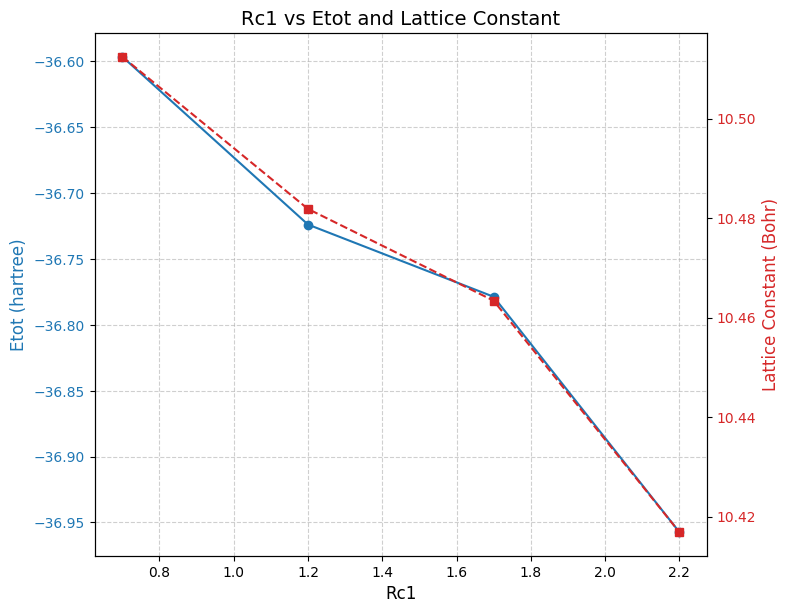

<Figure size 640x480 with 0 Axes>

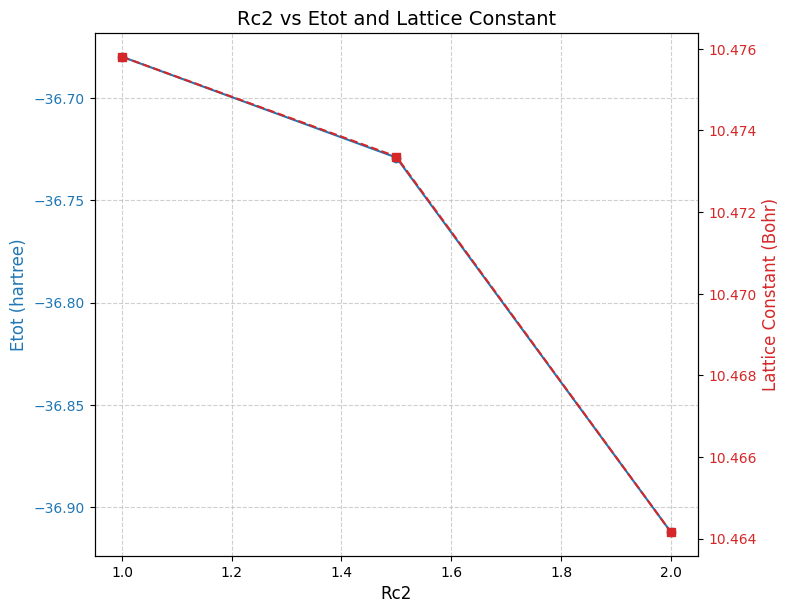

<Figure size 640x480 with 0 Axes>

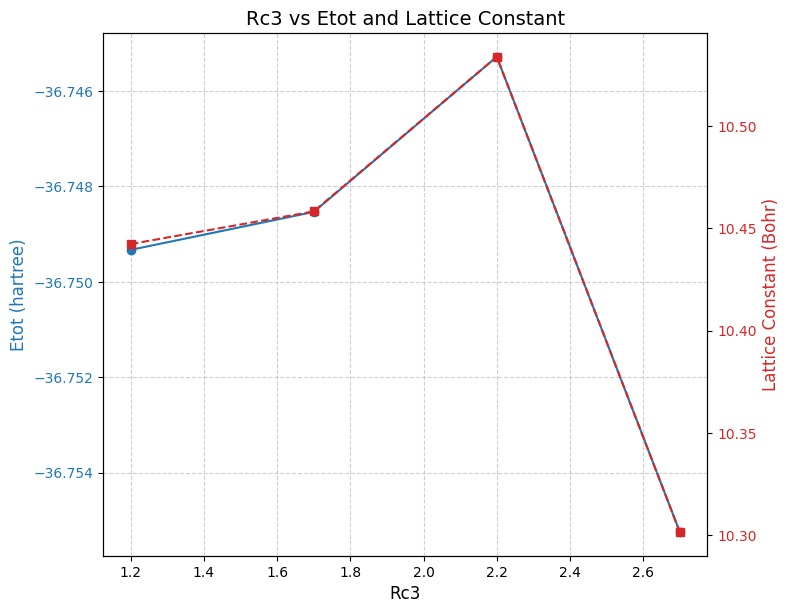

<Figure size 640x480 with 0 Axes>

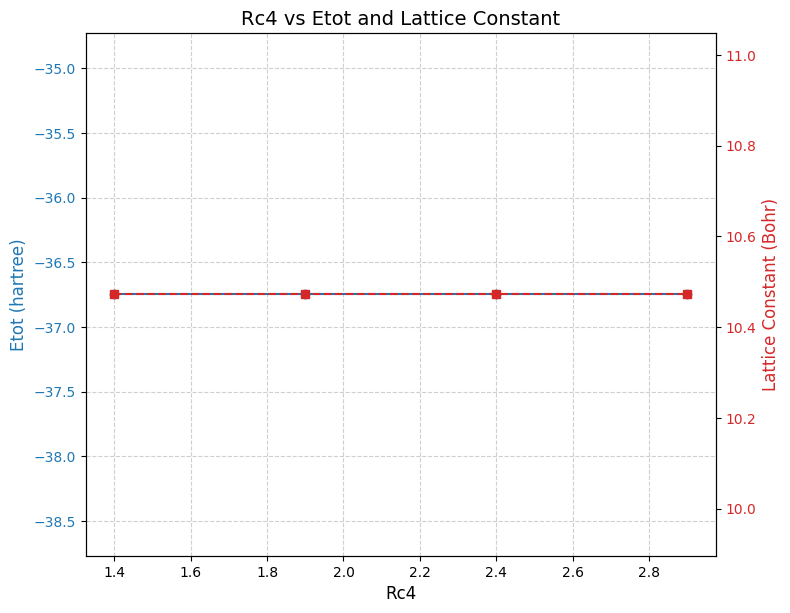

In [84]:

# modify the file here to read the correct file 
with open('/mnt/e/WSL/compmatphy/workdir2/result/rc20250127014337/results.csv', mode='r', encoding='utf-8') as file: 
    reader = csv.reader(file)
    data_tsmear = [row for row in reader]  # 将每一行数据保存到列表中

# 打印读取的数据
#print("读取的数据:", data_tsmear)

# 保存为另一个 CSV 文件
with open('output.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_tsmear)  # 写入多行数据



import matplotlib.pyplot as plt


# 提取列数据
header = data_tsmear[0]  # 列名
rows = data_tsmear[1:]   # 数据行



# 获取列数据
pseudo_rc = [[float(row[i]) for row in rows] for i in range(4)]
etotal = [float(row[4]) for row in rows]
acell1 = [float(row[5]) for row in rows]

# 定义每个图像所选择的数量
param_counts = [4, 3, 4, 4]

# 计算每个图像的数据范围
start = 0
ranges = []
for count in param_counts:
    end = start + count
    ranges.append((start, end, f'Rc{len(ranges) + 1}'))
    start = end

# 循环绘制每个图
for i, (start, end, rc_label) in enumerate(ranges, start=1):
    plt.figure(i)
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # 绘制第一条曲线 (etotal 对 ecuts)
    color = 'tab:blue'
    ax1.set_xlabel(rc_label, fontsize=12)
    ax1.set_ylabel('Etot (hartree)', color=color, fontsize=12)
    ax1.plot(pseudo_rc[int(rc_label[-1]) - 1][start:end], etotal[start:end], marker='o', linestyle='-', color=color, label='Etot')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # 创建第二个 Y 轴
    ax2 = ax1.twinx()  # 共享 X 轴
    color = 'tab:red'
    ax2.set_ylabel('Lattice Constant (Bohr)', color=color, fontsize=12)  # ℌ 是 Å 的 Unicode 表示
    ax2.plot(pseudo_rc[int(rc_label[-1]) - 1][start:end], acell1[start:end], marker='s', linestyle='--', color=color, label='Acell1')
    ax2.tick_params(axis='y', labelcolor=color)

    # 图例
    fig.tight_layout()  # 调整布局避免重叠
    plt.title(f'{rc_label} vs Etot and Lattice Constant', fontsize=14)
    file_name = f'{rc_label}.pdf'
    # 定义完整路径
    full_path = os.path.join(SAVEdir, file_name)
    # 保存图像
    fig.savefig(full_path, bbox_inches='tight')
    plt.show()

## Section 2 : $\vec{k}$ 点取法及收敛测试：总能量与晶格常数随 $\vec{k}$ 点的变化表

### Batch Run

In [86]:
def generate_abinit_relax_script_kgrid(kgrid,ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_param_file_name, IN_SCRIPT_OUTPUT_dir):
    """
    Generate a new ABINIT relaxation input script based on a template.

    Parameters:
        ABINIT_relax_raw_script (str): Template content for the ABINIT relaxation script.
        ABINIT_relax_script_name (str): Name of the new relaxation script file (without extension).
        abinit_psp_dir (str): Directory containing the ABINIT pseudopotentials.
        OPIUM_param_file_name (str): Base name of the pseudopotential file.
        IN_SCRIPT_OUTPUT_dir (str): Output directory for the generated script.
    """
    
    new_script_content = ABINIT_relax_raw_script.format(abinit_psp_dir=abinit_psp_dir, OPIUM_param_file_name=OPIUM_param_file_name,ngkptx=kgrid[0],ngkpty=kgrid[1],ngkptz=kgrid[2])

    # Construct the full path for the new script file
    new_script_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')
    
    # Ensure the output directory exists
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)
    os.chdir(IN_SCRIPT_OUTPUT_dir)
    # Generate the new script file
    with open(new_script_file_path, 'w') as f:
        f.write(new_script_content)

    print(f"The new script file {new_script_file_path} has been generated")

In [94]:
# Define the kgridnum values to loop through
kgridnums = [2, 4, 6, 8, 10,12]
# Define the base directory for the batch job and ensure it exists
timestamp = get_current_timestamp()
root_path = RESULTdir+"k"+timestamp #Add any remark here on the folders
os.makedirs(root_path, exist_ok=True)
csv_file_path = os.path.join(root_path, 'results.csv')

# Create and write the header row to the results CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    labels=['kgridnums', 'etotal', 'acell1', 'acell2', 'acell3'];
    writer.writerow(labels)

# Initialize batch results array
num_combinations = len(kgridnums)
num_labels=len(labels)
batch_results_array = np.zeros(( num_combinations,num_labels))  # Placeholder for results

# Loop through each kgridnum value
idx = 0
for kgridnum in kgridnums:
    kgrid = (kgridnum, kgridnum, kgridnum)
    kidr_name=kgridnum
    base_dir = os.path.join(root_path, f"relaxk{kgridnum}")

    # Read the raw script
    with open(SCRIPTdir+ABINIT_RELAX_RAW_file_K, "r") as file:
        ABINIT_relax_raw_script = file.read()

    IN_SCRIPT_OUTPUT_dir = base_dir
    ABINIT_relax_script_name = 'Relaxk'+str(kidr_name)

    # Create necessary directories
    os.makedirs(abinit_psp_dir, exist_ok=True)
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)

    # Generate the ABINIT relax script
    generate_abinit_relax_script_kgrid(kgrid, ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_file_name, IN_SCRIPT_OUTPUT_dir)

    # Define the input file for ABINIT
    ABINIT_RUNFILE = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')

    # Run the ABINIT process
    result = subprocess.run(['abinit', ABINIT_RUNFILE], capture_output=True, text=False)

    # Read the output data
    ncdb_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + 'o_OUT.nc')
    etotal = read_nc_variable(ncdb_file_path, 'etotal')
    acell = read_nc_variable(ncdb_file_path, 'acell')

    # Append results to the CSV file
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([kgridnum, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]])

    # Store results in the batch results array
    batch_results_array[idx, :] = [kgridnum, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]]
    idx += 1  # Increment the index
    print('Done: ' + str(idx) + '/' + str(num_combinations))


The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk2/Relaxk2.in has been generated
Done: 1/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk4/Relaxk4.in has been generated
Done: 2/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk6/Relaxk6.in has been generated
Done: 3/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk8/Relaxk8.in has been generated
Done: 4/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk10/Relaxk10.in has been generated
Done: 5/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/relaxk12/Relaxk12.in has been generated
Done: 6/6


读取的数据: [['kgridnums', 'etotal', 'acell1', 'acell2', 'acell3'], ['2', '-36.74955675120182', '10.60921792928355', '10.60921792928355', '10.60921792928355'], ['4', '-36.74800498303379', '10.491230906874163', '10.491230906874163', '10.491230906874163'], ['6', '-36.74819534441412', '10.517471374221145', '10.517471374221145', '10.517471374221145'], ['8', '-36.74821155180416', '10.516713141378755', '10.516713141378755', '10.516713141378755'], ['10', '-36.748209362478505', '10.515988429312735', '10.515988429312735', '10.515988429312735'], ['12', '-36.74821210925306', '10.517544056675103', '10.517544056675103', '10.517544056675103']]


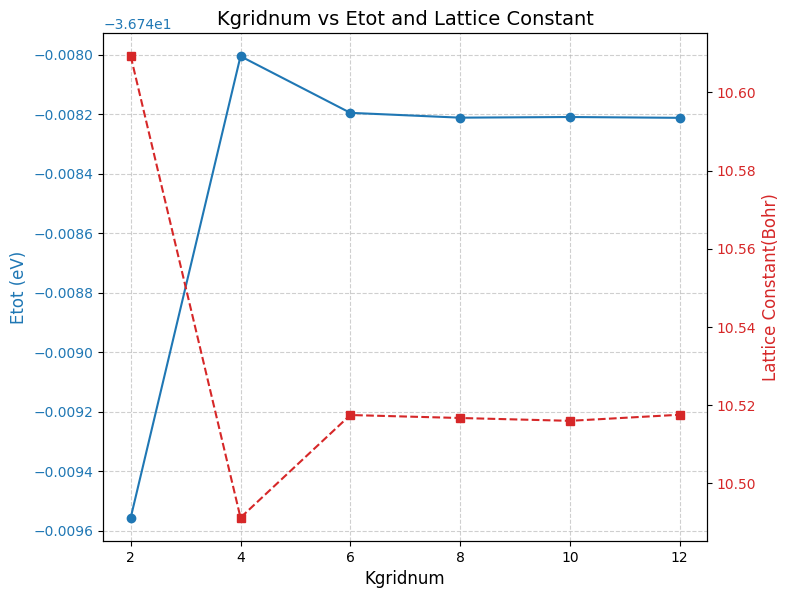

In [104]:
import csv

# 读取 CSV 文件
with open('/mnt/e/WSL/compmatphy/workdir2/result/k20250127020909/results.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    data = [row for row in reader]  # 将每一行数据保存到列表中

# 打印读取的数据
print("读取的数据:", data)

# 保存为另一个 CSV 文件
with open('output.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)  # 写入多行数据

import matplotlib.pyplot as plt
header = data[0]  # 列名
rows = data[1:]   # 数据行

# 获取列数据
kgridnum = [int(row[0]) for row in rows]  # 第一列: 整数
etotal = [float(row[1]) for row in rows]  # 第二列: 浮点数
acell1 = [float(row[2]) for row in rows]  # 第三列: 浮点数

# 创建双 Y 轴
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制第一条曲线 (etotal 对 kgridnum)
color = 'tab:blue'
ax1.set_xlabel('Kgridnum', fontsize=12)
ax1.set_ylabel('Etot (eV)', color=color, fontsize=12)
ax1.plot(kgridnum, etotal, marker='o', linestyle='-', color=color, label='Etot')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# 创建第二个 Y 轴
ax2 = ax1.twinx()  # 共享 X 轴
color = 'tab:red'
ax2.set_ylabel('Lattice Constant(Bohr)', color=color, fontsize=12) 
ax2.plot(kgridnum, acell1, marker='s', linestyle='--', color=color, label='Lattice Constant')
ax2.tick_params(axis='y', labelcolor=color)

# 图例
fig.tight_layout()  # 调整布局避免重叠
plt.title('Kgridnum vs Etot and Lattice Constant', fontsize=14)

file_name = f'kgrid.pdf'
# 定义完整路径
full_path = os.path.join(SAVEdir, file_name)
# 保存图像
fig.savefig(full_path, bbox_inches='tight')
plt.show()


## section 3: $E_{\text{cut}}$ 收敛测试：总能量与晶格常数随 $E_{\text{cut}}$ 的变化表

In [105]:
def generate_abinit_relax_script_ecut(ecut,ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_param_file_name, IN_SCRIPT_OUTPUT_dir):
    """
    Generate a new ABINIT relaxation input script based on a template.

    Parameters:
        ABINIT_relax_raw_script (str): Template content for the ABINIT relaxation script.
        ABINIT_relax_script_name (str): Name of the new relaxation script file (without extension).
        abinit_psp_dir (str): Directory containing the ABINIT pseudopotentials.
        OPIUM_param_file_name (str): Base name of the pseudopotential file.
        IN_SCRIPT_OUTPUT_dir (str): Output directory for the generated script.
    """
    
    new_script_content = ABINIT_relax_raw_script.format(abinit_psp_dir=abinit_psp_dir, OPIUM_param_file_name=OPIUM_param_file_name,ecut=ecut)

    # Construct the full path for the new script file
    new_script_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')
    
    # Ensure the output directory exists
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)
    os.chdir(IN_SCRIPT_OUTPUT_dir)
    # Generate the new script file
    with open(new_script_file_path, 'w') as f:
        f.write(new_script_content)

    print(f"The new script file {new_script_file_path} has been generated")

In [102]:
import os
import subprocess
import csv
import numpy as np

# Define the kgridnum values to loop through
ecuts = [10,15,20,25,30,35]

# Define the base directory for the batch job and ensure it exists
timestamp = get_current_timestamp()
root_path = RESULTdir+"Ecut"+timestamp #Add any remark here on the folders
os.makedirs(root_path, exist_ok=True)
csv_file_path = os.path.join(root_path, 'results.csv')
# Create and write the header row to the results CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    labels=['ecuts', 'etotal', 'acell1', 'acell2', 'acell3'];
    writer.writerow(labels)

# Initialize batch results array
num_combinations = len(ecuts)
num_labels=len(labels)
batch_results_array = np.zeros(( num_combinations,num_labels))  # Placeholder for results

# Loop through each kgridnum value
idx = 0
for ecut in ecuts:
    base_dir = os.path.join(root_path, f"relaxecut{ecut}")

    # Read the raw script
    with open(SCRIPTdir+ABINIT_RELAX_RAW_file_Ecut, "r") as file:
        ABINIT_relax_raw_script = file.read()

    IN_SCRIPT_OUTPUT_dir = base_dir
    ABINIT_relax_script_name = 'RelaxEcut'+str(ecut)

    # Create necessary directories
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)


    # Generate the ABINIT relax script
    generate_abinit_relax_script_ecut(ecut, ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_file_name, IN_SCRIPT_OUTPUT_dir)

    # Define the input file for ABINIT
    ABINIT_RUNFILE = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')

    # Run the ABINIT process
    result = subprocess.run(['abinit', ABINIT_RUNFILE], capture_output=True, text=False)

    # Read the output data
    ncdb_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + 'o_OUT.nc')
    etotal = read_nc_variable(ncdb_file_path, 'etotal')
    acell = read_nc_variable(ncdb_file_path, 'acell')

    # Append results to the CSV file
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([ecut, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]])

    # Store results in the batch results array
    batch_results_array[idx, :] = [ecut, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]]
    idx += 1  # Increment the index
    print('Done: ' + str(idx) + '/' + str(num_combinations))


The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut10/RelaxEcut10.in has been generated
Done: 1/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut15/RelaxEcut15.in has been generated
Done: 2/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut20/RelaxEcut20.in has been generated
Done: 3/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut25/RelaxEcut25.in has been generated
Done: 4/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut30/RelaxEcut30.in has been generated
Done: 5/6
The new script file /mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/relaxecut35/RelaxEcut35.in has been generated
Done: 6/6


读取的数据: [['ecuts', 'etotal', 'acell1', 'acell2', 'acell3'], ['10', '-36.55468081490919', '10.742051899325098', '10.742051899325098', '10.742051899325098'], ['15', '-36.716617891890714', '10.600385226666734', '10.600385226666734', '10.600385226666734'], ['20', '-36.74507481436904', '10.51408049762519', '10.51408049762519', '10.51408049762519'], ['25', '-36.74819534441412', '10.517471374221145', '10.517471374221145', '10.517471374221145'], ['30', '-36.74831700574889', '10.516073066484894', '10.516073066484894', '10.516073066484894'], ['35', '-36.74836044404468', '10.516176087892452', '10.516176087892452', '10.516176087892452']]


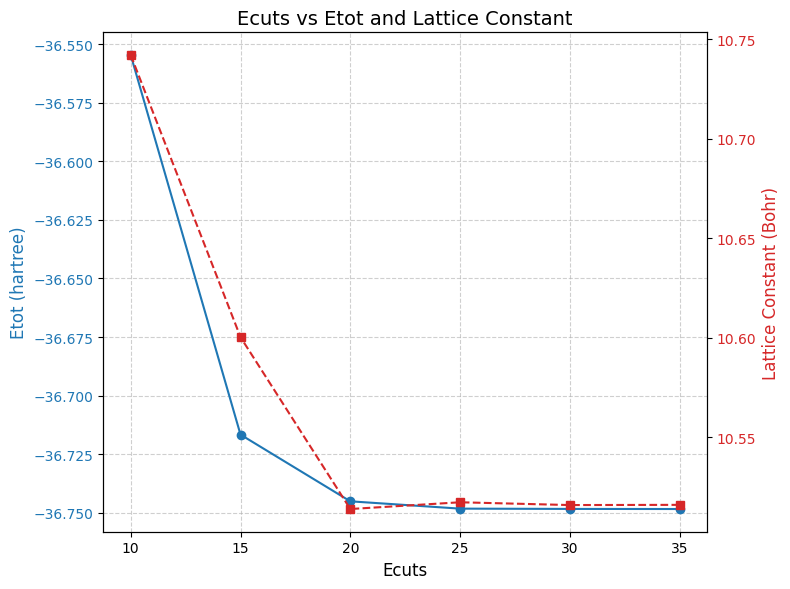

In [106]:
import csv

# 读取 CSV 文件
with open('/mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127021713/results.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    data_ecut = [row for row in reader]  # 将每一行数据保存到列表中

# 打印读取的数据
print("读取的数据:", data_ecut)

# 保存为另一个 CSV 文件
with open('output.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_ecut)  # 写入多行数据



import matplotlib.pyplot as plt


# 提取列数据
header = data_ecut[0]  # 列名
rows = data_ecut[1:]   # 数据行

# 获取列数据
ecuts = [int(row[0]) for row in rows]  # 第一列: 整数
etotal = [float(row[1]) for row in rows]  # 第二列: 浮点数
acell1 = [float(row[2]) for row in rows]  # 第三列: 浮点数

# 创建双 Y 轴
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制第一条曲线 (etotal 对 ecuts)
color = 'tab:blue'
ax1.set_xlabel('Ecuts', fontsize=12)
ax1.set_ylabel('Etot (hartree)', color=color, fontsize=12)
ax1.plot(ecuts, etotal, marker='o', linestyle='-', color=color, label='Etot')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# 创建第二个 Y 轴
ax2 = ax1.twinx()  # 共享 X 轴
color = 'tab:red'
ax2.set_ylabel('Lattice Constant (Bohr)', color=color, fontsize=12)  # Å 是 Å 的 Unicode 表示
ax2.plot(ecuts, acell1, marker='s', linestyle='--', color=color, label='Lattice Constant')
ax2.tick_params(axis='y', labelcolor=color)

# 图例
fig.tight_layout()  # 调整布局避免重叠
plt.title('Ecuts vs Etot and Acell1', fontsize=14)


# 图例
fig.tight_layout()  # 调整布局避免重叠
plt.title('Ecuts vs Etot and Lattice Constant', fontsize=14)

file_name = f'ecut.pdf'
# 定义完整路径
full_path = os.path.join(SAVEdir, file_name)
# 保存图像
fig.savefig(full_path, bbox_inches='tight')
plt.show()


## Section 4: 金属展宽测试

In [109]:
def generate_abinit_relax_script_tsmear(tsmear,ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_param_file_name, IN_SCRIPT_OUTPUT_dir):
    """
    Generate a new ABINIT relaxation input script based on a template.

    Parameters:
        ABINIT_relax_raw_script (str): Template content for the ABINIT relaxation script.
        ABINIT_relax_script_name (str): Name of the new relaxation script file (without extension).
        abinit_psp_dir (str): Directory containing the ABINIT pseudopotentials.
        OPIUM_param_file_name (str): Base name of the pseudopotential file.
        IN_SCRIPT_OUTPUT_dir (str): Output directory for the generated script.
    """
    
    new_script_content = ABINIT_relax_raw_script.format(abinit_psp_dir=abinit_psp_dir, OPIUM_param_file_name=OPIUM_param_file_name,tsmear=tsmear)

    # Construct the full path for the new script file
    new_script_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')
    
    # Ensure the output directory exists
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)
    os.chdir(IN_SCRIPT_OUTPUT_dir)
    # Generate the new script file
    with open(new_script_file_path, 'w') as f:
        f.write(new_script_content)

    print(f"The new script file {new_script_file_path} has been generated")

In [112]:
# Define the kgridnum values to loop through
tsmears = np.arange(0.01, 0.21, 0.01)  # 注意终点设置为 0.21，因为 arange 不包括右端点
print(tsmears)


timestamp = get_current_timestamp()
root_path = RESULTdir+"tsmear"+timestamp #Add any remark here on the folders
os.makedirs(root_path, exist_ok=True)
csv_file_path = os.path.join(root_path, 'results.csv')

# Create and write the header row to the results CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    labels=['tsmears', 'etotal', 'acell1', 'acell2', 'acell3'];
    writer.writerow(labels)

# Initialize batch results array
num_combinations = len(tsmears)
num_labels=len(labels)
batch_results_array = np.zeros(( num_combinations,num_labels))  # Placeholder for results
print('Total: ', num_combinations)

# Loop through each kgridnum value
idx = 0
for tsmear in tsmears:
    base_dir = os.path.join(root_path, f"relaxtsmear{tsmear}")

    # Read the raw script
    with open(SCRIPTdir+ABINIT_RELAX_RAW_file_TSMEAR, "r") as file:
        ABINIT_relax_raw_script = file.read()

    IN_SCRIPT_OUTPUT_dir = base_dir
    ABINIT_relax_script_name = 'tsmear' + str(tsmear).replace('.', 'p')


    # Create necessary directories
    os.makedirs(IN_SCRIPT_OUTPUT_dir, exist_ok=True)

    OPIUM_param_file_name = 'Ca'

    # Generate the ABINIT relax script
    generate_abinit_relax_script_tsmear(tsmear, ABINIT_relax_raw_script, ABINIT_relax_script_name, abinit_psp_dir, OPIUM_param_file_name, IN_SCRIPT_OUTPUT_dir)

    # Define the input file for ABINIT
    ABINIT_RUNFILE = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + '.in')

    # Run the ABINIT process
    result = subprocess.run(['abinit', ABINIT_RUNFILE], capture_output=True, text=False)

    # Read the output data
    ncdb_file_path = os.path.join(IN_SCRIPT_OUTPUT_dir, ABINIT_relax_script_name + 'o_OUT.nc')
    etotal = read_nc_variable(ncdb_file_path, 'etotal')
    acell = read_nc_variable(ncdb_file_path, 'acell')

    # Append results to the CSV file
    with open(csv_file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([tsmear, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]])

    # Store results in the batch results array
    #batch_results_array[idx, :] = [tsmear, etotal.data[0], acell.data[0], acell.data[1], acell.data[2]]
    idx += 1  # Increment the index
    print('Done: ' + str(idx) + '/' + str(num_combinations))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2 ]
Total:  20
The new script file /mnt/e/WSL/compmatphy/workdir2/result/tsmear20250127022856/relaxtsmear0.01/tsmear0p01.in has been generated
Done: 1/20
The new script file /mnt/e/WSL/compmatphy/workdir2/result/tsmear20250127022856/relaxtsmear0.02/tsmear0p02.in has been generated
Done: 2/20
The new script file /mnt/e/WSL/compmatphy/workdir2/result/tsmear20250127022856/relaxtsmear0.03/tsmear0p03.in has been generated
Done: 3/20
The new script file /mnt/e/WSL/compmatphy/workdir2/result/tsmear20250127022856/relaxtsmear0.04/tsmear0p04.in has been generated
Done: 4/20
The new script file /mnt/e/WSL/compmatphy/workdir2/result/tsmear20250127022856/relaxtsmear0.05/tsmear0p05.in has been generated


KeyboardInterrupt: 

读取的数据: [['tsmears', 'etotal', 'acell1', 'acell2', 'acell3'], ['0.01', '-36.74804287438232', '10.528638953807357', '10.528638953807357', '10.528638953807357'], ['0.02', '-36.74808586722029', '10.522079282663674', '10.522079282663674', '10.522079282663674'], ['0.03', '-36.74814751503329', '10.518144074759892', '10.518144074759892', '10.518144074759892'], ['0.04', '-36.74822558916206', '10.516212480590706', '10.516212480590706', '10.516212480590706'], ['0.05', '-36.74831700574889', '10.516073066484894', '10.516073066484894', '10.516073066484894'], ['0.060000000000000005', '-36.748419740572174', '10.51561927180715', '10.51561927180715', '10.51561927180715']]


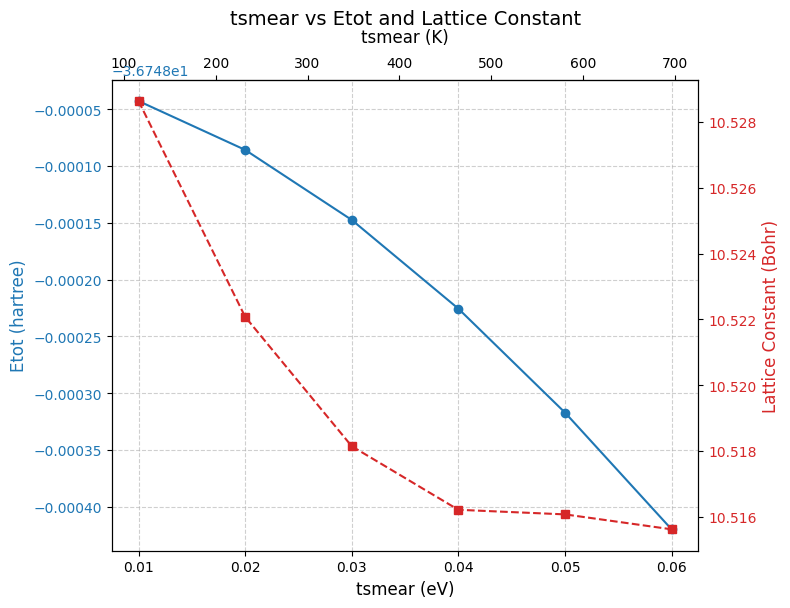

In [111]:
import csv

# 读取 CSV 文件
with open('/mnt/e/WSL/compmatphy/workdir2/result/Ecut20250127022501/results.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    data_tsmear = [row for row in reader]  # 将每一行数据保存到列表中

# 打印读取的数据
print("读取的数据:", data_tsmear)

# 保存为另一个 CSV 文件
with open('output.csv', mode='w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_tsmear)  # 写入多行数据



import matplotlib.pyplot as plt


# 提取列数据
header = data_tsmear[0]  # 列名
rows = data_tsmear[1:]   # 数据行

# 获取列数据F
tsmear = [float(row[0]) for row in rows]  # 第一列: 浮点数
etotal = [float(row[1]) for row in rows]  # 第二列: 浮点数
acell1 = [float(row[2]) for row in rows]  # 第三列: 浮点数


# 绘制图形并增加标题位置的调整
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制第一条曲线 (etotal 对 tsmear)
color = 'tab:blue'
ax1.set_xlabel('tsmear (eV)', fontsize=12)
ax1.set_ylabel('Etot (hartree)', color=color, fontsize=12)
ax1.plot(tsmear, etotal, marker='o', linestyle='-', color=color, label='Etot')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# 创建第二个 Y 轴
ax2 = ax1.twinx()  # 共享 X 轴
color = 'tab:red'
ax2.set_ylabel('Lattice Constant (Bohr)', color=color, fontsize=12)
ax2.plot(tsmear, acell1, marker='s', linestyle='--', color=color, label='Lattice Constant')
ax2.tick_params(axis='y', labelcolor=color)

# 添加次要刻度（以 K 为单位）
kb = 8.617e-5  # 玻尔兹曼常数 (eV/K)
tsmear_k = np.array(tsmear) / kb  # 转换为 K
ax1.secondary_xaxis('top', functions=(lambda x: x / kb, lambda x: x * kb)).set_xlabel('tsmear (K)', fontsize=12, labelpad=10)

# 图例
fig.tight_layout()  # 调整布局避免重叠
plt.title('tsmear vs Etot and Lattice Constant', fontsize=14, pad=40)  # 调整标题位置

file_name = f'tsmear.pdf'
# 定义完整路径
full_path = os.path.join(SAVEdir, file_name)
# 保存图像
fig.savefig(full_path, bbox_inches='tight')
plt.show()



## Section 5:Energy Band Plot

### 能带计算

In [139]:

def calculate_path_lengths(high_symmetry_points, total_points):
    """
    计算每段路径的长度，并按比例分配采样点。
    
    Parameters:
        high_symmetry_points (list): 高对称点的坐标列表，每个点是 (x, y, z) 格式。
        total_points (int): 总采样点数。
    
    Returns:
        lengths (list): 每段路径的长度。
        points_per_segment (list): 每段路径的采样点数量（整数）。
    """
    # 计算每段路径的长度
    lengths = []
    for i in range(len(high_symmetry_points) - 1):
        p1 = np.array(high_symmetry_points[i])
        p2 = np.array(high_symmetry_points[i + 1])
        length = np.linalg.norm(p2 - p1)
        lengths.append(length)
    
    # 总路径长度
    total_length = sum(lengths)
    
    # 按比例分配采样点
    points_per_segment = [
        max(1, int(round((length / total_length) * total_points)))
        for length in lengths
    ]
    
    # 确保总点数与目标一致
    points_difference = total_points - sum(points_per_segment)
    for i in range(abs(points_difference)):
        points_per_segment[i % len(points_per_segment)] += np.sign(points_difference)
    
    return lengths, points_per_segment

In [140]:
# 您提供的高对称点路径
high_symmetry_points1 = [
    (0.0, 0.0, 0.0),  # Gamma
    (0.5, 0.0, 0.5),  # X
    (0.5, 0.25, 0.75),  # W
    (0.375, 0.375, 0.75),  # K
    (0.0, 0.0, 0.0),  # Gamma
    (0.5, 0.5, 0.5),  # L
    (0.675, 0.25, 0.674),  # U
    (0.5, 0.25, 0.75),  # W
    (0.5, 0.5, 0.5),  # L
    (0.375, 0.375, 0.75),  # K
#    (0.0, 0.0, 0.0),  # Gamma
]
kptopt2num = len(high_symmetry_points1)-1
# 设置总采样点数
total_points1 = 400  # 可根据需要调整

# 计算路径长度和采样点
lengths, points_per_segment1 = calculate_path_lengths(high_symmetry_points1, total_points1)

# 输出结果
print("Segment lengths:", lengths)
print("Points per segment:", points_per_segment1)

# 将路径和点写入文件或直接输出
print("\nPath details:")
for i in range(len(high_symmetry_points1) - 1):
    print(f"Segment {i + 1}: {high_symmetry_points1[i]} -> {high_symmetry_points1[i + 1]}, Points: {points_per_segment1[i]}")


kptbounds2n = " ".join(map(str, points_per_segment1))

high_symmetry_points1_series = "\n".join(
    f"{x[0]} {x[1]} {x[2]}" for x in high_symmetry_points1
)

Segment lengths: [0.7071067811865476, 0.3535533905932738, 0.1767766952966369, 0.9185586535436918, 0.8660254037844386, 0.3512847847544781, 0.1907904609774818, 0.3535533905932738, 0.30618621784789724]
Points per segment: [68, 33, 17, 87, 82, 33, 18, 33, 29]

Path details:
Segment 1: (0.0, 0.0, 0.0) -> (0.5, 0.0, 0.5), Points: 68
Segment 2: (0.5, 0.0, 0.5) -> (0.5, 0.25, 0.75), Points: 33
Segment 3: (0.5, 0.25, 0.75) -> (0.375, 0.375, 0.75), Points: 17
Segment 4: (0.375, 0.375, 0.75) -> (0.0, 0.0, 0.0), Points: 87
Segment 5: (0.0, 0.0, 0.0) -> (0.5, 0.5, 0.5), Points: 82
Segment 6: (0.5, 0.5, 0.5) -> (0.675, 0.25, 0.674), Points: 33
Segment 7: (0.675, 0.25, 0.674) -> (0.5, 0.25, 0.75), Points: 18
Segment 8: (0.5, 0.25, 0.75) -> (0.5, 0.5, 0.5), Points: 33
Segment 9: (0.5, 0.5, 0.5) -> (0.375, 0.375, 0.75), Points: 29


In [141]:
# 您提供的高对称点路径
high_symmetry_points2 = [
    (0.675, 0.25, 0.674),  # U
    (0.5, 0.0, 0.5),  # X
]
kptopt3num = len(high_symmetry_points2)-1
# 设置总采样点数
total_points2 = 20  # 可根据需要调整

# 计算路径长度和采样点
lengthsUX, points_per_segment2 = calculate_path_lengths(high_symmetry_points2, total_points2)

# 输出结果
print("Segment lengths:", lengthsUX)
print("Points per segment:", points_per_segment2)

# 将路径和点写入文件或直接输出
print("\nPath details:")
for i in range(len(high_symmetry_points2) - 1):  # 修正循环范围
    print(f"Segment {i + 1}: {high_symmetry_points2[i]} -> {high_symmetry_points2[i + 1]}, Points: {high_symmetry_points2[i]}")

kptbounds3n = " ".join(map(str, points_per_segment2))

high_symmetry_points_seriesUX = "\n".join(
    f"{x[0]} {x[1]} {x[2]}" for x in high_symmetry_points2  # 确保使用high_symmetry_points2
)


Segment lengths: [0.3512847847544781]
Points per segment: [20]

Path details:
Segment 1: (0.675, 0.25, 0.674) -> (0.5, 0.0, 0.5), Points: (0.675, 0.25, 0.674)


In [142]:
Ca_ABINIT_band=f"""acell 10.438847158060293 10.438847158060293 10.438847158060293 
rprim  0.0  0.5  0.5   # FCC primitive vectors (to be scaled by acell)
       0.5  0.0  0.5   
       0.5  0.5  0.0

ntypat 1          
znucl 20         

natom 1               # There is only one atom per cell
typat 1                # This atom is of type 1
xred 0.0  0.0  0.0    # This keyword indicate that the location of the atoms


ecut  25         # Maximal kinetic energy cut-off, in Hartree
prtgsr 1 #produce a GSR file include band structure,
#forces, stresses, electronic density
nstep 200          # Maximal number of SCF cycles
#diemac #metal
ndtset 3 #Gives the number of data sets to be treated.
###1 SCF
kptopt1 1          # Option for the automatic generation of k points, taking
                  # into account the symmetry
nshiftk1 4
shiftk1  0.5 0.5 0.5  # These shifts will be the same for all grids
        0.5 0.0 0.0
        0.0 0.5 0.0
        0.0 0.0 0.5
ngkpt1  6 6 6 
prtden1 1
toldfe1 1.0d-6


###2 band GXWKGLUWLK
iscf2 -2 #Controls the self-consistency algorithm.-2 for band
getden2 -1 # get charge density from previous dataset;-:previous

kptopt2 -{kptopt2num}

nband2 20
ndivk2 {kptbounds2n}
kptbounds2
{high_symmetry_points_series}


enunit2 1 # use eV as energy unit
tolwfr2 1.0d-10

###3 band UX Part
iscf3 -2 #Controls the self-consistency algorithm.-2 for band
getden3 -1 # get charge density from previous dataset;-:previous

kptopt3 -{kptopt3num}

nband3 20
ndivk3 {kptbounds3n}
kptbounds3
{high_symmetry_points_seriesUX}


enunit3 1 # use eV as energy unit
tolwfr3 1.0d-10

##Input pseudopotential files
pp_dirpath "/mnt/e/WSL/compmatphy/workdir/abinit-psp/" #The path of pseudopotential files
pseudos "Ca.fhi" #The name of pseudopotential files for Ca"""

band_file_dir = RESULTdir+'band/'
os.makedirs(band_file_dir, exist_ok=True)
band_file_name = "bandcalc.in"
band_file_path = band_file_dir+band_file_name
with open(band_file_path, "w") as f:
    f.write(Ca_ABINIT_band)

####手动在命令行内输入指令 abinit band_file_name.in


### Band Structure Plotting

In [143]:
import matplotlib.pyplot as plt

def read_agr(file_path):
    """
    读取 ABINIT 输出的 .agr 文件并提取数据。
    返回一个列表，其中每个元素是一个路径段的 (k, E) 数据。
    """
    band_data = []
    current_band = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            # 跳过以 # 开头或空行
            if not line or line.startswith("#") or line.startswith("@"):
                if current_band:
                    band_data.append(current_band)
                    current_band = []
                continue

            try:
                k, e = map(float, line.split())
                current_band.append((k, e))
            except ValueError:
                # 如果某行无法解析为浮点数，跳过该行
                continue

    if current_band:  # 添加最后一段
        band_data.append(current_band)

    return band_data


def plot_band_structure(band_data, title="Band Structure"):
    """
    绘制能带图。
    band_data 是一个列表，其中每个元素是路径段的 (k, E) 数据。
    """
    plt.figure(figsize=(8, 6))
    for band in band_data:
        k_vals, e_vals = zip(*band)
        plt.plot(k_vals, e_vals, color='b')

    plt.xlabel("Wave Vector (k)")
    plt.ylabel("Energy (eV)")
    plt.title(title)
    plt.grid(True)
    plt.show()

import matplotlib.pyplot as plt

def read_agr(file_path):
    """
    读取 ABINIT 输出的 .agr 文件并提取数据。
    返回一个列表，其中每个元素是一个路径段的 (k, E) 数据。
    """
    band_data = []
    current_band = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            # 跳过以 # 开头或空行
            if not line or line.startswith("#") or line.startswith("@"):
                if current_band:
                    band_data.append(current_band)
                    current_band = []
                continue

            try:
                k, e = map(float, line.split())
                current_band.append((k, e))
            except ValueError:
                # 如果某行无法解析为浮点数，跳过该行
                continue

    if current_band:  # 添加最后一段
        band_data.append(current_band)

    return band_data

import matplotlib.pyplot as plt

def plot_band_structure_4(band_data, xlim=None, ylim=None, high_symmetry_points=None, points_per_segment=None, ax=None, hide_y_label=False, hide_y_ticks=False, title="Band Structure"):
    """
    绘制能带图，支持设置xy轴限制，并标注高对称点。
    
    参数：
    - band_data: 能带数据，每段路径 (k, E) 的列表。
    - xlim: x轴限制，格式为 (xmin, xmax)。
    - ylim: y轴限制，格式为 (ymin, ymax)。
    - high_symmetry_points: 高对称点的名称列表，例如 ["Γ", "X", "W", "K", "Γ"]。
    - points_per_segment: 每段高对称点之间的间隔数量。
    - ax: 可选，matplotlib 轴对象，用于指定在哪个子图上绘制。如果为 None，则自动创建一个新的图形。
    - hide_y_label: 布尔值，是否隐藏y轴标签。
    - hide_y_ticks: 布尔值，是否隐藏y轴刻度。
    - title: 自定义标题，默认为 "Band Structure"。
    """
    
    # 如果没有提供 ax，则创建一个新的图形和轴
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # 绘制能带数据
    for band in band_data:
        k_values = [k for k, e in band]
        energy_values = [e for k, e in band]
        ax.plot(k_values, energy_values, color="blue", linewidth=1)

    # 设置轴限制
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    # 标注高对称点
    if high_symmetry_points and points_per_segment:
        total_k_points = sum(points_per_segment)
        # 确保高对称点的总数量匹配
        assert len(high_symmetry_points) == len(points_per_segment) + 1, "高对称点数量不匹配"

        high_symmetry_positions = []
        current_pos = 0
        for i, interval in enumerate(points_per_segment):
            high_symmetry_positions.append(current_pos)
            current_pos += interval
        high_symmetry_positions.append(current_pos)  # 添加最后一个位置

        # 确保高对称点位置按比例映射到 x 轴
        if xlim:
            scale_factor = (xlim[1] - xlim[0]) / total_k_points
            high_symmetry_positions = [pos * scale_factor + xlim[0] for pos in high_symmetry_positions]
        
        # 绘制垂直线和标注
        for pos, label in zip(high_symmetry_positions, high_symmetry_points):
            ax.axvline(x=pos, color="black", linestyle="--", linewidth=0.5)
            ax.text(pos, ylim[0] - 0.5, label, ha="center", va="top", fontsize=10)
    
    # Fermi Energy
    ax.axhline(y=0, color="red", linestyle="--", linewidth=1)
    
    # 设置轴标签
    ax.set_xticks([])  # 隐藏 x 轴上的数值刻度

    # 根据 hide_y_label 参数决定是否隐藏 y 轴标签
    if not hide_y_label:
        ax.set_ylabel("Energy (eV)", fontsize=12)

    # 根据 hide_y_ticks 参数决定是否隐藏 y 轴刻度
    if hide_y_ticks:
        ax.set_yticks([])  # 隐藏 y 轴上的数值刻度
    
    # 添加网格
    ax.grid(alpha=0.3)
    
    # 设置标题
    ax.set_title(title, fontsize=14)
    
    # 如果没有传入 ax，显示图像
    if ax is None:
        plt.tight_layout()
        plt.show()

    


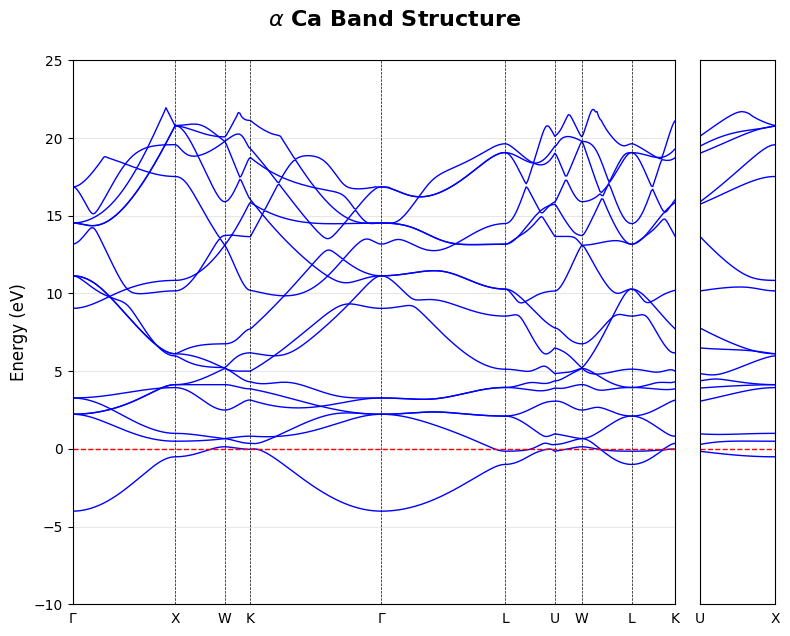

In [145]:


# First plot data
file_path1 = "/mnt/e/WSL/compmatphy/workdir/debugband/250126/full666/bandcalco_DS2_EBANDS.agr"
band_data1 = read_agr(file_path1)
high_symmetry_points1 = ["Γ", "X", "W", "K", "Γ", "L", "U", "W", "L", "K"]
points_per_segment1 = [68, 33, 17, 87, 82, 33, 18, 33, 29]

xlim1 = (0, sum(points_per_segment1))  # k-axis range
ylim1 = (-10, 25)  # Energy range in eV

# Second plot data
file_path2 = "/mnt/e/WSL/compmatphy/workdir/debugband/250126/full666/bandcalco_DS3_EBANDS.agr"
band_data2 = read_agr(file_path2)
high_symmetry_points2 = ["U", "X"]
points_per_segment2 = [20]  # Adjust this as per the actual data
xlim2 = (0, sum(points_per_segment2))  # k-axis range

# Create a GridSpec with different width ratios
fig = plt.figure(figsize=(8, 6))  # Set the figure size

# Create a GridSpec layout for 1 row and 2 columns with width ratios
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[8, 1])  # 2:1 width ratio

# Create subplots based on the GridSpec layout
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot the first band structure in the first subplot (ax1)
plot_band_structure_4(band_data1, xlim=xlim1, ylim=ylim1, high_symmetry_points=high_symmetry_points1, points_per_segment=points_per_segment1, ax=ax1, hide_y_label=False, hide_y_ticks=False,title="")

# Plot the second band structure in the second subplot (ax2)
plot_band_structure_4(band_data2, xlim=xlim2, ylim=ylim1, high_symmetry_points=high_symmetry_points2, points_per_segment=points_per_segment2, ax=ax2, hide_y_label=True, hide_y_ticks=True,title="")

# Save the combined figure
plt.tight_layout()  # Ensure proper spacing between the subplots

fig.suptitle(r'$\alpha$ Ca Band Structure', fontsize=16, fontweight='bold', y=1.05)  # Using LaTeX formatting
file_name='eband_combined.pdf'
full_path = os.path.join(SAVEdir, file_name)

# 保存图像
fig.savefig(full_path, bbox_inches='tight')

plt.show()
